## This one is typical for threshold value selection and also for producing figures

Import and define basic function

In [1]:
# iPython specific stuff
# %matplotlib inline
import IPython.display
from ipywidgets import interact, interactive, fixed

# Packages we're using
import numpy as np
import matplotlib.pyplot as plt
import copy
from scipy.io import wavfile
from scipy.signal import butter, lfilter
import scipy.ndimage
import soundfile as sf


def overlap(X, window_size, window_step):
    if window_size % 2 != 0:
        raise ValueError("Window size must be even!")
    # Make sure there are an even number of windows before stridetricks
    append = np.zeros((window_size - len(X) % window_size))
    X = np.hstack((X, append))

    ws = window_size
    ss = window_step
    a = X

    valid = len(a) - ws
    nw = (valid) // ss
    out = np.ndarray((nw, ws), dtype=a.dtype)

    for i in range(nw):
        # "slide" the window along the samples
        start = i * ss
        stop = start + ws
        out[i] = a[start: stop]

    return out


def stft(X, fftsize=128, step=65, mean_normalize=True, real=False,
         compute_onesided=True):
    if real:
        local_fft = np.fft.rfft
        cut = -1
    else:
        local_fft = np.fft.fft
        cut = None
    if compute_onesided:
        cut = fftsize // 2
    if mean_normalize:
        X -= X.mean()

    X = overlap(X, fftsize, step)

    size = fftsize
    win = 0.54 - .46 * np.cos(2 * np.pi * np.arange(size) / (size - 1))
    X = X * win[None]
    X = local_fft(X)[:, :cut]
    return X


def pretty_spectrogram(d, log=True, thresh=5, fft_size=512, step_size=64):
    specgram = np.abs(stft(d, fftsize=fft_size, step=step_size, real=False,
                           compute_onesided=True))

    if log == True:
        specgram /= specgram.max()  # volume normalize to max 1
        specgram = np.log10(specgram)  # take log
        specgram[specgram < -thresh] = -thresh  # set anything less than the threshold as the threshold
    else:
        specgram[specgram < thresh] = thresh  # set anything less than the threshold as the threshold

    return specgram


Load data

In [46]:
data, rate = \
    sf.read('/home/william/Documents/code/Desk top12.10from_disk/flac_dataforcnn/10002.flac')
# Only use a short clip for our demo
data = data[:16000 * 3]


if np.shape(data)[0] / float(rate) > 10:
    data = data[0:rate * 10]
print('Length in time (s): ', np.shape(data)[0] / float(rate))


Length in time (s):  3.0


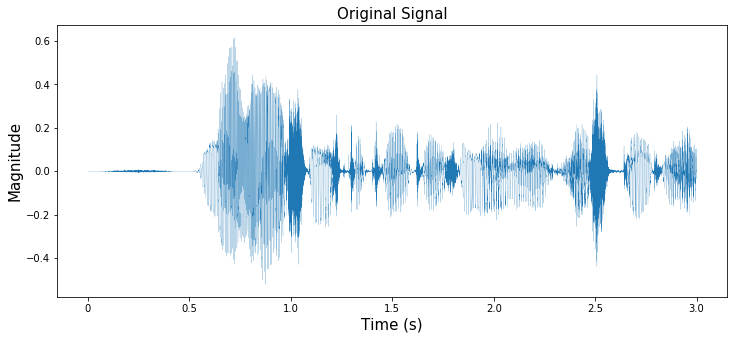

In [54]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

#plt.figure(figsize=(9,5))
plt.plot(data,linewidth=0.15)

#plt.xlim(0,48000)
for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,48000,7999.9999)
plt.xticks(my_x_ticks)

ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])
plt.title('Original Signal',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Magnitude',fontsize=15)
plt.savefig('Original Signal0424final',dpi=1200)
plt.show()


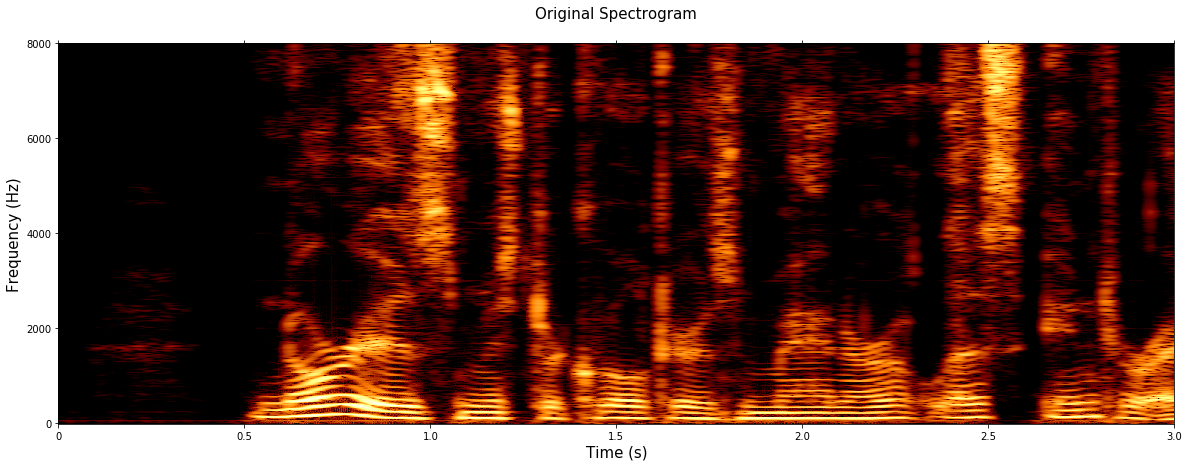

(11776, 512)
4


In [68]:
### Parameters ###
fft_size = 1024  # window size for the FFT
step_size = int(fft_size /256)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,11776,1962.6666)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,512,127.9999)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=1024 step_size=4_0428final_11776*512',dpi=1200)
plt.show()

print(wav_spectrogram.shape)
print(step_size)

Below are figures generated for compare stft parameters

# Fig1 
## 256,256
## 187x128

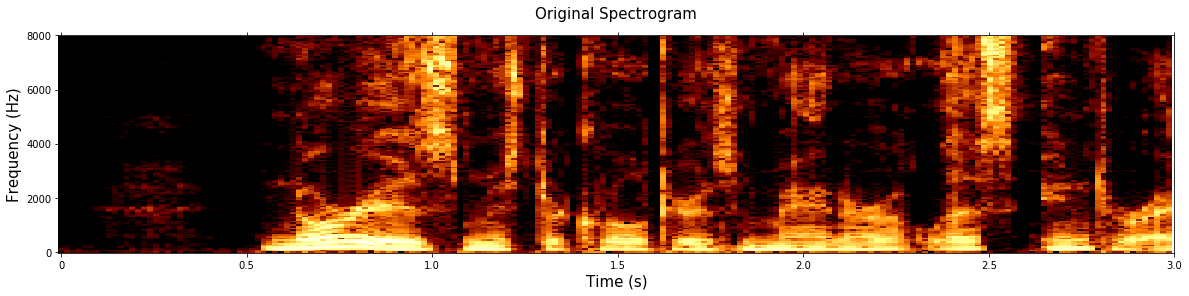

(187, 128)
256


In [83]:
### Parameters ###
fft_size = 256  # window size for the FFT
step_size = int(fft_size / 1)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,187,187/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,128,128/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=256 step_size=256_0428final_187*128',dpi=1200)


plt.show()

print(wav_spectrogram.shape)
print(step_size)



# Fig2
## 256,64
## 748x128

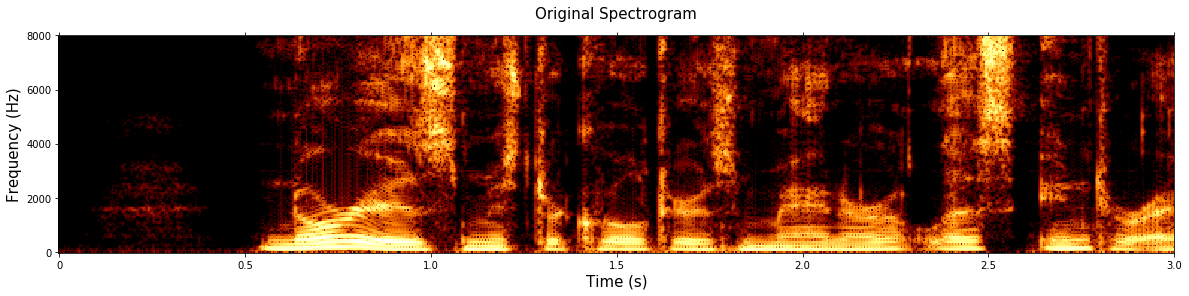

(748, 128)
64
748
128


In [84]:
### Parameters ###
fft_size = 256  # window size for the FFT
step_size = int(fft_size /4)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,wav_spectrogram.shape[0],wav_spectrogram.shape[0]/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,wav_spectrogram.shape[1],wav_spectrogram.shape[1]/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])


plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=256 step_size=64_0428final_748*128',dpi=1200)


plt.show()

print(wav_spectrogram.shape)
print(step_size)
print(wav_spectrogram.shape[0])
print(wav_spectrogram.shape[1])

# Fig3 
## 512,256
## 186x256

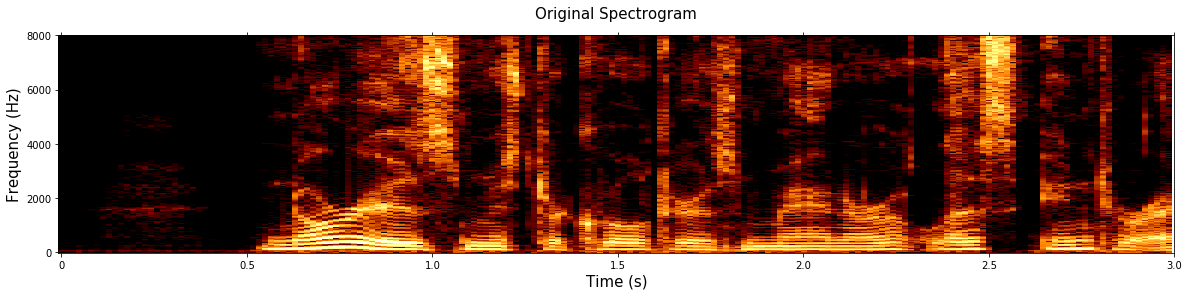

(186, 256)
256


In [85]:
### Parameters ###
fft_size = 512  # window size for the FFT
step_size = int(fft_size /2)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)
for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,wav_spectrogram.shape[0],wav_spectrogram.shape[0]/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,wav_spectrogram.shape[1],wav_spectrogram.shape[1]/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])


plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=512 step_size=256_0428final_186*256',dpi=1200)

plt.show()

print(wav_spectrogram.shape)
print(step_size)

# Fig4 (practical one) 
## 512,128
## 372X256

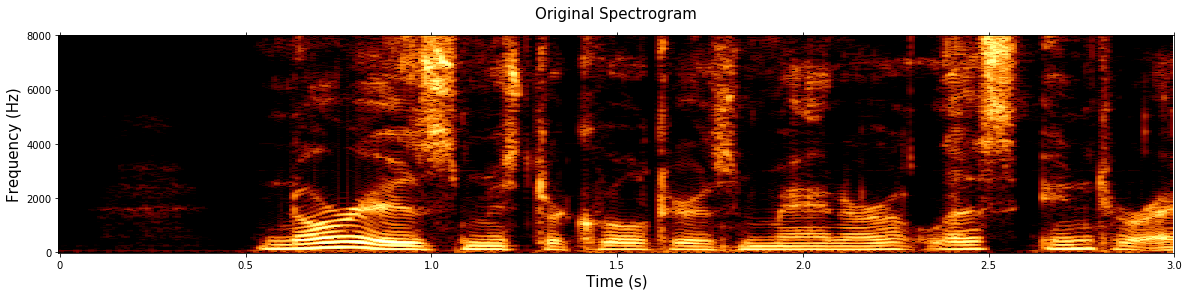

(372, 256)
128


In [86]:
### Parameters ###
fft_size = 512  # window size for the FFT
step_size = int(fft_size /4)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,wav_spectrogram.shape[0],wav_spectrogram.shape[0]/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,wav_spectrogram.shape[1],wav_spectrogram.shape[1]/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])


plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=512 step_size=256_0428final_372*256',dpi=1200)

plt.show()

print(wav_spectrogram.shape)
print(step_size)

# Fig5 
## 512,2
## 23808x256

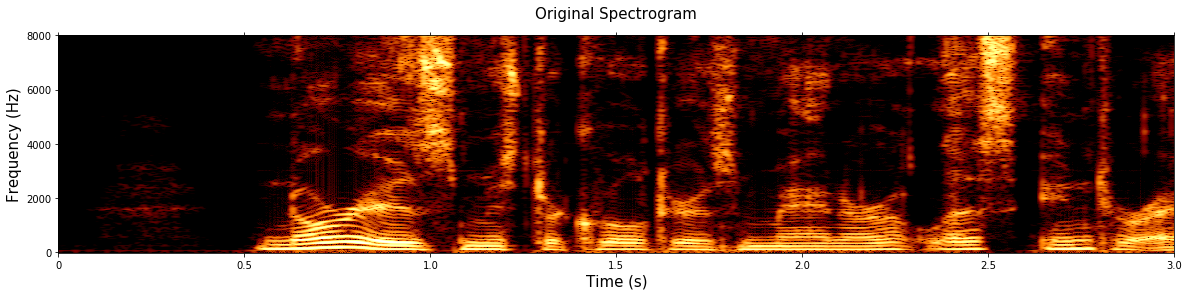

(23808, 256)
2


In [87]:
### Parameters ###
fft_size = 512  # window size for the FFT
step_size = 2 #int(fft_size /512) #distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,wav_spectrogram.shape[0],wav_spectrogram.shape[0]/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,wav_spectrogram.shape[1],wav_spectrogram.shape[1]/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=512 step_size=2_0428final_23808*256',dpi=1200)


plt.show()

print(wav_spectrogram.shape)
print(step_size)

# Fig6 
## 1024,2
## 23552x512

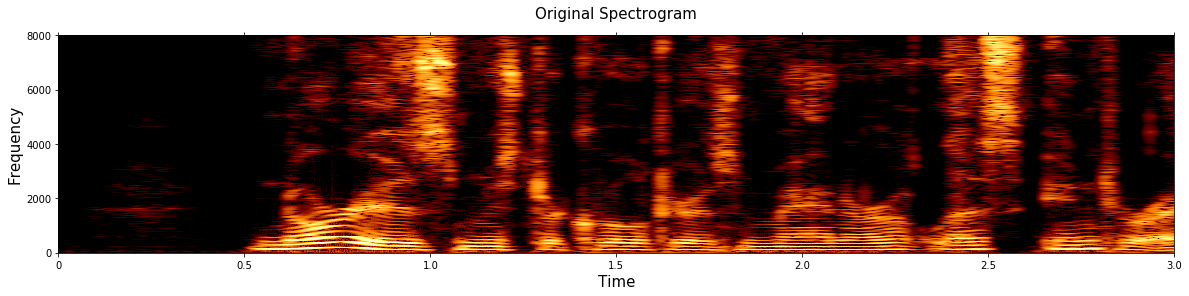

(23552, 512)
2


In [88]:
### Parameters ###
fft_size = 1024  # window size for the FFT
step_size = 2 #int(fft_size /512) #distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,wav_spectrogram.shape[0],wav_spectrogram.shape[0]/6-0.0001)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,wav_spectrogram.shape[1],wav_spectrogram.shape[1]/4-0.0001)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=1024 step_size=2_0428final_23552*512',dpi=1200)


plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
#plt.savefig('Original Spectrogram fft_size=1024 step_size=2',dpi=1200)
plt.show()

print(wav_spectrogram.shape)
print(step_size)

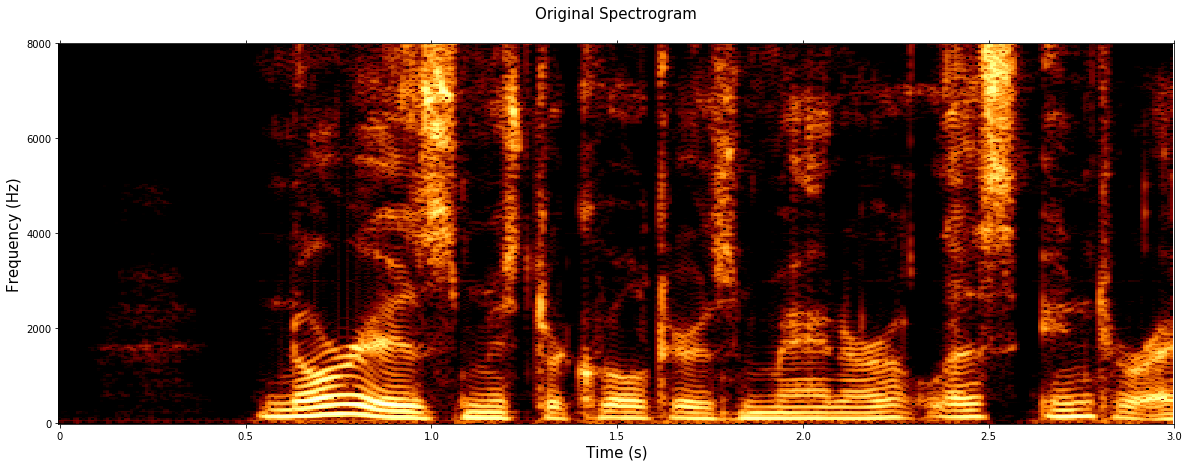

(372, 256)
128


In [89]:
### Parameters ###
fft_size = 512  # window size for the FFT
step_size = int(fft_size /4)  # distance to slide along the window (in time)
spec_thresh = 3.2  # threshold for spectrograms (lower filters out more noise)


wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,372,61.9999)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,256,63.9999)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram fft_size=512 step_size=128_0428final_practicalone',dpi=1200)
plt.show()

print(wav_spectrogram.shape)
print(step_size)

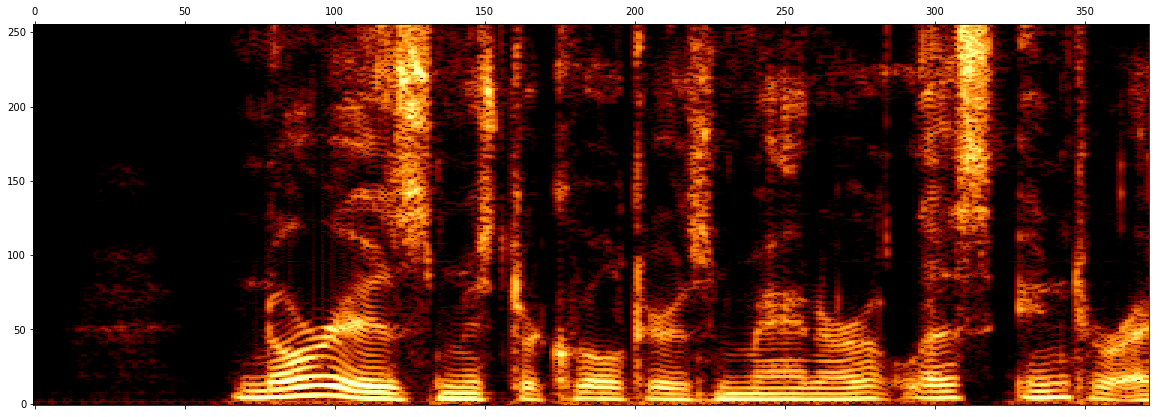

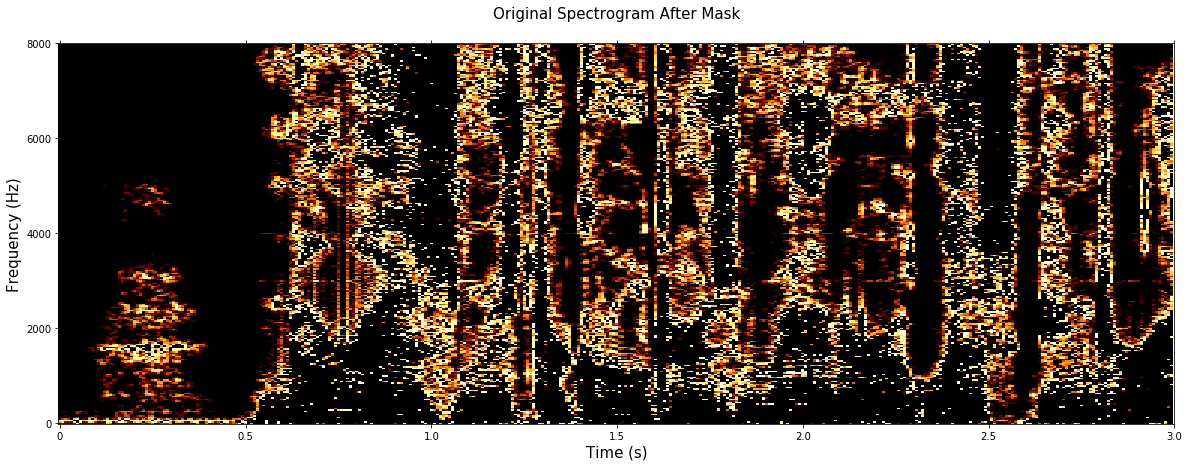

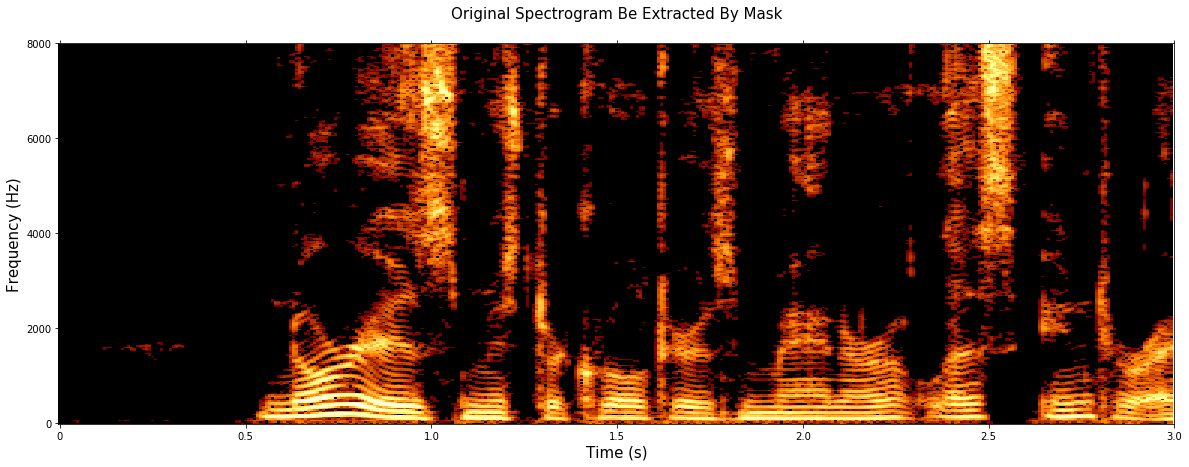

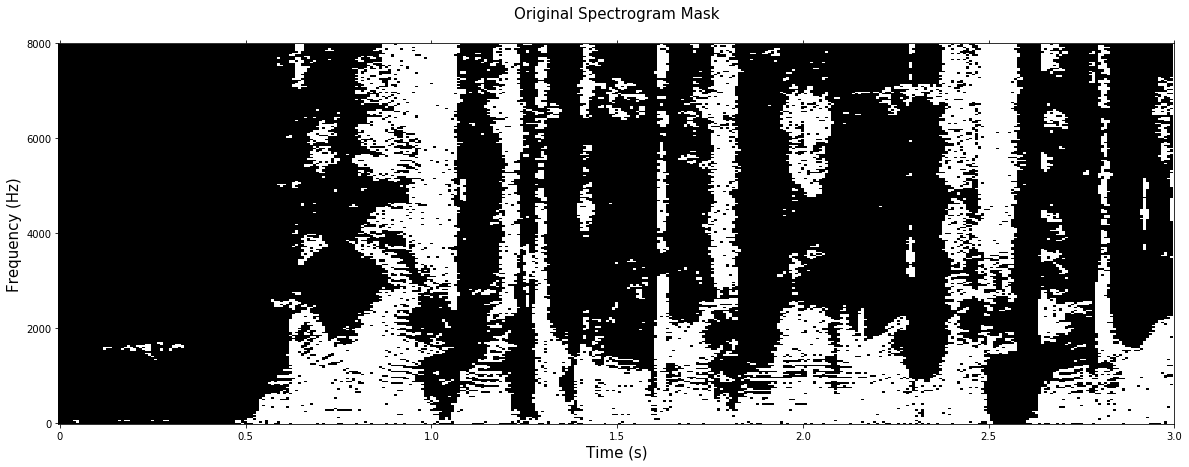

Have a glance of data:
 [-1.57797496e-04 -9.67623393e-05 -1.88315074e-04 ...  4.93863805e-03
 -5.80354945e-03  8.72281774e-03]
Have a glance of stft:
 [[-1.37637802e-02+0.00000000e+00j -1.71088521e-02-5.63183787e-02j
   5.34884614e-02+7.04774586e-02j ... -9.95572894e-04+3.95334410e-04j
   4.03928279e-04-4.11637427e-04j  3.32964471e-04+2.84813860e-04j]
 [-3.31103770e-02+0.00000000e+00j  6.09314370e-02+3.37554042e-02j
  -8.14182522e-02-5.73532406e-02j ... -7.22327136e-04-4.48415706e-04j
  -2.83416397e-04+3.17304699e-04j  7.81099373e-04-2.47225923e-04j]
 [-1.30527530e-02+0.00000000e+00j -3.42959573e-02-7.83473919e-03j
   8.53683887e-02+4.89367508e-02j ... -2.15563010e-04-2.74860627e-04j
   1.08013552e-04+2.91734550e-04j -1.04619829e-04-4.04435963e-04j]
 ...
 [ 5.81309812e-02+0.00000000e+00j -6.98648509e-02+2.32958969e-02j
   1.88576164e+00+9.18505444e-01j ... -2.95582677e-03+2.50906104e-03j
  -5.36142619e-03-3.17892835e-04j -3.84392495e-03-2.14185194e-04j]
 [ 5.41490548e-01+0.00000000e+00

In [94]:
wav_spectrogram = pretty_spectrogram(data.astype('float64'), fft_size=fft_size,
                                     step_size=step_size, log=True, thresh=spec_thresh)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
fig.colorbar(cax)
plt.title('Original Spectrogram',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
#plt.savefig('Original Spectrogram fft_size=512 step_size=128_0428final_practicalone',dpi=1200)
plt.show()

wav_spectrogram_mask1 = np.where(wav_spectrogram < -2.5, wav_spectrogram, -3.2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram_mask1), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)

for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,372,61.9999)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,256,63.9999)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram After Mask',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram After Mask',dpi=1200)
plt.show()

wav_spectrogram_mask2 = np.where(wav_spectrogram > -2.5, wav_spectrogram, -3.2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram_mask2), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)
for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,372,61.9999)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,256,63.9999)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram Be Extracted By Mask',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram Be Extracted By Mask',dpi=1200)
plt.show()

wav_spectrogram_mask3 = np.where(wav_spectrogram_mask2 != -3.2, wav_spectrogram_mask2, 0
                                 )

wav_spectrogram_mask4 = np.where(wav_spectrogram_mask3 == 0, wav_spectrogram_mask3, 1
                                 )

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
cax = ax.matshow(np.transpose(wav_spectrogram_mask4), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot,
                 origin='lower')
#fig.colorbar(cax)
for tick in ax.xaxis.get_major_ticks():
    tick.label1On=True
    tick.label2On=False
my_x_ticks = np.arange(0,372,61.9999)
plt.xticks(my_x_ticks)
ax.set_xticklabels(['0','0.5','1.0','1.5','2.0','2.5','3.0','3.5'])

my_y_ticks = np.arange(0,256,63.9999)
plt.yticks(my_y_ticks)
ax.set_yticklabels(['0','2000','4000','6000','8000'])

plt.title('Original Spectrogram Mask',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Frequency (Hz)',fontsize=15)
plt.savefig('Original Spectrogram Mask',dpi=1200)
plt.show()

print('Have a glance of data:\n', data)

stft_complex_value = stft(data, fftsize=fft_size, step=step_size, real=False,
                           compute_onesided=True)

print('Have a glance of stft:\n', stft_complex_value)